In [1]:
import ROOT as rt
# import root_numpy as rtnp
import csv
import re
import sys
import collections

from collections import OrderedDict
import uproot
import pandas as pd

import scipy
import awkward
import numpy as np
import time
import numba
from numba import jit
from matplotlib import pyplot as plt
sys.path.append('/storage/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/lib/')
from histo_utilities import create_TH1D, create_TH2D, std_color_list, create_TGraph, make_ratio_plot

import CMS_lumi, tdrstyle
tdrstyle.setTDRStyle()
CMS_lumi.writeExtraText = 0

wH = 1
Z_MASS = 91.2


# donotdelete = []
print(sys.version)

Welcome to JupyROOT 6.18/02
3.6.8 (default, Aug  7 2019, 17:28:10) 
[GCC 4.8.5 20150623 (Red Hat 4.8.5-39)]


# Load ntuples

In [2]:
limitTrees =OrderedDict()
dataCards = OrderedDict()

limitTrees10 =OrderedDict()
dataCards10 = OrderedDict()

version = '/V1p14/v1/v1/'
OLD_CTAU = 1
limitDir = '/storage/user/christiw/login-1/christiw/LLP/CMSSW_10_2_13/src/HiggsAnalysis/MuonSystemLimit/combine/limitTrees/'+version
dataCardDir = '/storage/user/christiw/login-1/christiw/LLP/CMSSW_10_2_13/src/HiggsAnalysis/MuonSystemLimit/combine/datacards/'+version
lumi = 105.30388711* 1000
# ctaus = np.array([5, 10, 30, 50, 100, 500, 1000, 5000, 10000])
# signal_norm = [0.21486444425582887, 0.8782269554138182, 12.492485580444336, 23.266965423583986, 40.29793115234375, 43.2841708984375]


ctaus = np.array([30, 40, 50, 100, 200, 300, 500, 1000, 5000, 10000, 100000])

# assert(len(ctaus) == len(signal_norm))
limits = np.ones((len(ctaus), 6))

### limit branch: 2.5, 16.0, 50.0, 84.0, 97.5, obs

for ct in ctaus:
    OLD_CTAU = 1
    limitTrees[ct] = limitDir + 'higgsCombine.ctau'+str(OLD_CTAU)+'m_reweight_ctau' + str(ct) + 'cm_nRechit130dPhi0p6.AsymptoticLimits.mH120.root'
    dataCards[ct] = dataCardDir + 'ggh_mh125_mx55_ctau'+str(OLD_CTAU)+'m_reweight_' + str(ct) + 'cm_nRechit130dPhi0p6.txt'
    
    OLD_CTAU = 10
    limitTrees10[ct] = limitDir + 'higgsCombine.ctau'+str(OLD_CTAU)+'m_reweight_ctau' + str(ct) + 'cm_nRechit130dPhi0p6.AsymptoticLimits.mH120.root'
    dataCards10[ct] = dataCardDir + 'ggh_mh125_mx55_ctau'+str(OLD_CTAU)+'m_reweight_' + str(ct) + 'cm_nRechit130dPhi0p6.txt'

norms = []
for i,k in enumerate(limitTrees.keys()):
    T = uproot.open(limitTrees[k])['limit']
    T10 = uproot.open(limitTrees10[k])['limit']
    line = open(dataCards[k], "r").readline()
    signal_norm = float(line.split(" ")[3])
    line = open(dataCards10[k], "r").readline()
    signal_norm10 = float(line.split(" ")[3])
    
    if T.array('limit')[2]/signal_norm < T10.array('limit')[2]/signal_norm10:
        limit_temp = np.array(T.array('limit'))/signal_norm
        norms.append(signal_norm)
    else:
        limit_temp = np.array(T10.array('limit'))/signal_norm10
        norms.append(signal_norm10)

#     if float(k) <= 10:
#         limit_temp = np.array(T.array('limit'))/signal_norm
#         norms.append(signal_norm)

#     else:
#         limit_temp = np.array(T10.array('limit'))/signal_norm10
#         norms.append(signal_norm10)

#     limit_temp = np.array(T10.array('limit'))/signal_norm10
#     norms.append(signal_norm10)

    
    
    
    if i == 0: limits = limit_temp
    else: limits = np.vstack((limits, limit_temp))

limits = np.array(limits)
print(ctaus)
print(limits[:,2])
print(limits[0])
print(norms)
#[0.00941727 0.00232179 0.00032019 0.0002337  0.00017991 0.00017472]



[    30     40     50    100    200    300    500   1000   5000  10000
 100000]
[3.47545539e-03 2.89007370e-03 2.62496839e-03 2.36563673e-03
 2.73874584e-03 3.56731412e-03 6.05415373e-03 1.06256304e-02
 7.48644378e-02 2.40538398e-01 1.94729405e+01]
[1.43905575e-03 2.12315876e-03 3.47545539e-03 5.99675836e-03
 1.00683342e-02 1.54636586e-05]
[764.288330078125, 870.436279296875, 931.558837890625, 977.5380859375, 807.281005859375, 611.0164184570312, 356.1604309082031, 273.51318359375, 36.106929779052734, 11.075414657592773, 0.13480244576931]


# load atlas limit

In [4]:
file_dir = '/storage/user/christiw/login-1/christiw/LLP/CMSSW_10_2_13/src/HiggsAnalysis/MuonSystemLimit/data/'
msv1 = file_dir + 'atlas_mh125_mx40_1msv.csv'
msv2 = file_dir + 'atlas_mh125_mx40_2msv.csv'
msv1 = np.genfromtxt(msv1, delimiter=',')
msv2 = np.genfromtxt(msv2, delimiter=',')

# Plot

[3.e-01 4.e-01 5.e-01 1.e+00 2.e+00 3.e+00 5.e+00 1.e+01 5.e+01 1.e+02
 1.e+03]
[3.47545539e-03 2.89007370e-03 2.62496839e-03 2.36563673e-03
 2.73874584e-03 3.56731412e-03 6.05415373e-03 1.06256304e-02
 7.48644378e-02 2.40538398e-01 1.94729405e+01]
105.3 fb^{-1} (13 TeV)


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


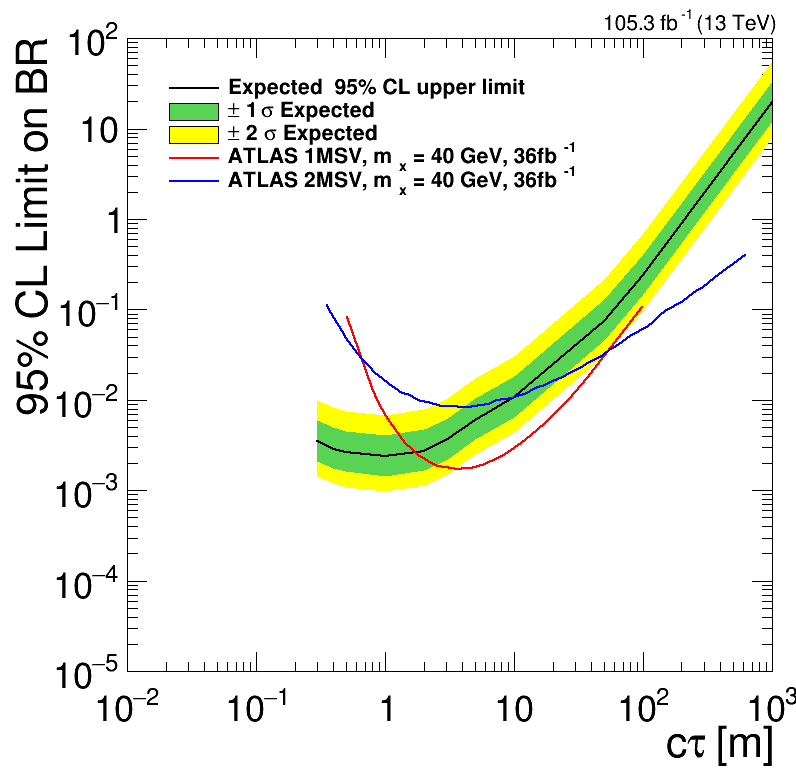

In [6]:
import importlib
importlib.reload(sys.modules['histo_utilities'])
from histo_utilities import create_TH1D, create_TH2D, std_color_list, create_TGraph, make_ratio_plot
leg = rt.TLegend(0.2,0.75,0.55,0.90)
leg.SetTextSize(0.03)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.01)



c = rt.TCanvas('c','c', 800, 800)
# Plotting ncsc
start_t = time.time()

rt.gStyle.SetOptFit(1011)
# for i,k in enumerate(tree_bkg.keys()):
br = 1
ctaus_m = ctaus/100
print(ctaus_m)
print(limits[:,2])

h_msv1 = create_TGraph(msv1[:,0],msv1[:,1],  axis_title=['c#tau [m]', '95% CL Limit on BR'])

h_msv2 = create_TGraph(msv2[:,0],msv2[:,1],  axis_title=['c#tau [m]', '95% CL Limit on BR'])

h = create_TGraph(ctaus_m, limits[:,2],  axis_title=['c#tau [m]', '95% CL Limit on BR'])

h_exp1sig = create_TGraph(np.hstack((ctaus_m, np.flip(ctaus_m))), np.hstack((limits[:,1], np.flip(limits[:,3]))))
h_exp2sig = create_TGraph(np.hstack((ctaus_m, np.flip(ctaus_m))), np.hstack((limits[:,0], np.flip(limits[:,4]))))
leg.AddEntry(h, "Expected  95% CL upper limit", "L")
leg.AddEntry(h_exp1sig, "#pm 1 #sigma Expected", 'F')
leg.AddEntry(h_exp2sig, "#pm 2 #sigma Expected", 'F')
leg.AddEntry(h_msv1, "ATLAS 1MSV, m_{x} = 40 GeV, 36fb^{-1}", 'L')
leg.AddEntry(h_msv2, "ATLAS 2MSV, m_{x} = 40 GeV, 36fb^{-1}", 'L')

h_exp1sig.SetFillColor(std_color_list[3])
h_exp2sig.SetFillColor(5)
h.SetLineColor(std_color_list[0])
h_msv1.SetLineColor(std_color_list[1])
h_msv2.SetLineColor(std_color_list[2])

h.SetLineWidth(2)
h_msv1.SetLineWidth(2)
h_msv2.SetLineWidth(2)

h.Draw('LA')

h.GetXaxis().SetLimits(0.01,1000.0)
h.GetYaxis().SetRangeUser(1e-5,100)
h.GetXaxis().SetTitleOffset(1)

h_exp2sig.Draw('Fsame')
h_exp1sig.Draw('Fsame')
h.Draw('Lsame')

h_msv1.Draw('Lsame')
h_msv2.Draw('Lsame')


    
CMS_lumi.lumi_13TeV = str(round(lumi/1000,2))+" fb^{-1}"
CMS_lumi.cmsText = ""
CMS_lumi.relPosY = 0.05
CMS_lumi.writeExtraText = False
CMS_lumi.CMS_lumi(c,4,4)



leg.Draw()
c.SetRightMargin(0.03)
c.SetLogy()
c.SetLogx()

c.Draw()
# print(time.time()-start_t)

# limit for different nrechits

##### load ntuples

In [393]:
limitTrees =OrderedDict()
dataCards = OrderedDict()
version = '/V1p14/v1/v1/'
OLD_CTAU = 10 #m
# NEW_CTAU = 60 #cm
limitDir = '/storage/user/christiw/login-1/christiw/LLP/CMSSW_10_2_13/src/HiggsAnalysis/MuonSystemLimit/combine/limitTrees/'+version
dataCardDir = '/storage/user/christiw/login-1/christiw/LLP/CMSSW_10_2_13/src/HiggsAnalysis/MuonSystemLimit/combine/datacards/'+version
nRechits = np.arange(120,220,10)
ctaus = np.array([30, 40, 50, 100, 200, 300, 500, 1000, 5000, 10000, 100000])
print(nRechits)

for NEW_CTAU in ctaus:
#     if not NEW_CTAU == 100:continue
    limits = np.ones((len(nRechits), 6))
    ### limit branch: 2.5, 16.0, 50.0, 84.0, 97.5, obs
#     print(str(NEW_CTAU))
    for nRechit in nRechits:
        limitTrees[str(nRechit)] = limitDir + 'higgsCombine.ctau'+str(OLD_CTAU)+'m_reweight_ctau' + str(NEW_CTAU) + 'cm_nRechit'+str(nRechit)+'dPhi0p6.AsymptoticLimits.mH120.root'
        dataCards[str(nRechit)] = dataCardDir + 'ggh_mh125_mx55_ctau'+str(OLD_CTAU)+'m_reweight_' + str(NEW_CTAU) + 'cm_nRechit'+str(nRechit)+'dPhi0p6.txt'
    for i,k in enumerate(limitTrees.keys()):
        root_dir = uproot.open(limitTrees[k]) 
        T = root_dir['limit']
        text_file = open(dataCards[k], "r")
        line = text_file.readline()
        signal_norm = float(line.split(" ")[3])
        if i == 0: limits = np.array(T.array('limit'))/signal_norm
        else: limits = np.vstack((limits, T.array('limit')/signal_norm))
    #     print("signal_norm",signal_norm)
    limits = np.array(limits)
    print(str([round(i, 5) for i in limits[:,2]])[1:-1])
    
    result = nRechits[np.where(limits[:,2] == np.amin(limits[:,2]))]
#     print(NEW_CTAU, "nRechits cut with minimum limit: ", result)
#[0.00941727 0.00232179 0.00032019 0.0002337  0.00017991 0.00017472]

#[0.00281103 0.00246823 0.00212178 0.00202198 0.00234197 0.00315816 0.00535222 0.01515513 0.27569254 1.00375406]

[120 130 140 150 160 170 180 190 200 210]
0.02622, 0.02665, 0.0203, 0.02636, 0.02481, 0.02312, 0.02206, 0.02213, 0.02221, 0.02101
0.01094, 0.0114, 0.00893, 0.01117, 0.01048, 0.00979, 0.00939, 0.00945, 0.00945, 0.00896
0.00674, 0.00711, 0.0057, 0.0069, 0.00647, 0.00605, 0.00584, 0.00589, 0.00589, 0.00559
0.00326, 0.00346, 0.00298, 0.00328, 0.00308, 0.00296, 0.0029, 0.00297, 0.00296, 0.00281
0.00349, 0.00363, 0.00325, 0.00342, 0.00323, 0.00317, 0.00319, 0.00332, 0.0033, 0.00314
0.00438, 0.0045, 0.00406, 0.00424, 0.00403, 0.00397, 0.00405, 0.0042, 0.00418, 0.00397
0.00618, 0.00631, 0.0057, 0.00595, 0.00564, 0.00554, 0.00562, 0.00585, 0.00585, 0.00556
0.01028, 0.01063, 0.00951, 0.00983, 0.00943, 0.00905, 0.00908, 0.0096, 0.00977, 0.00925
0.0701, 0.07486, 0.06578, 0.06621, 0.06448, 0.06058, 0.06102, 0.06534, 0.06686, 0.06318
0.22502, 0.24054, 0.21021, 0.21162, 0.20597, 0.19328, 0.19469, 0.20809, 0.21303, 0.20174
18.19792, 19.47294, 17.03882, 17.03882, 16.57518, 15.53199, 15.6479, 16.69109, 

#### plot limit vs. nrechit

[0.00238162 0.00236564 0.00209391 0.00208592 0.00201399 0.00193407
 0.00188612 0.00192608 0.00196604]
nRechits cut with minimum limit:  [180]


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


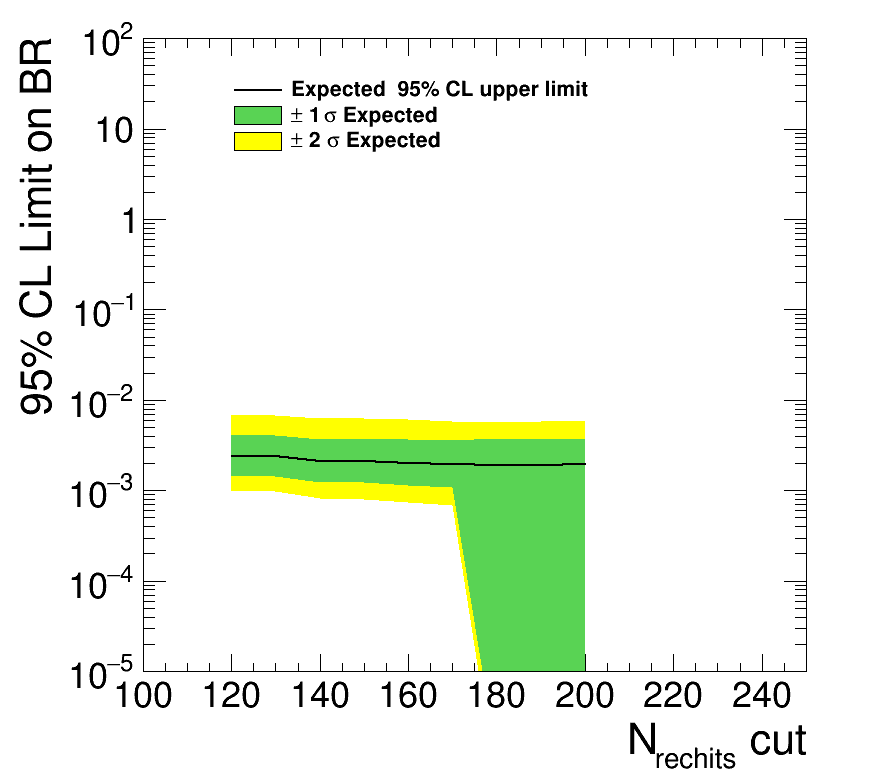

In [379]:
import importlib
importlib.reload(sys.modules['histo_utilities'])
from histo_utilities import create_TH1D, create_TH2D, std_color_list, create_TGraph, make_ratio_plot
leg = rt.TLegend(0.25,0.80,0.55,0.90)
leg.SetTextSize(0.03)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.01)



c = rt.TCanvas('c','c', 900, 800)
# Plotting ncsc
start_t = time.time()

rt.gStyle.SetOptFit(1011)
# for i,k in enumerate(tree_bkg.keys()):
br = 1
ctaus_m = ctaus/100
print(limits[:,2])
h = create_TGraph(nRechits, limits[:,2],  axis_title=['N_{rechits} cut', '95% CL Limit on BR'])
h_exp1sig = create_TGraph(np.hstack((nRechits, np.flip(nRechits))), np.hstack((limits[:,1], np.flip(limits[:,3]))))
h_exp2sig = create_TGraph(np.hstack((nRechits, np.flip(nRechits))), np.hstack((limits[:,0], np.flip(limits[:,4]))))
leg.AddEntry(h, "Expected  95% CL upper limit", "L")
leg.AddEntry(h_exp1sig, "#pm 1 #sigma Expected", 'F')
leg.AddEntry(h_exp2sig, "#pm 2 #sigma Expected", 'F')

h_exp1sig.SetFillColor(std_color_list[3])
h_exp2sig.SetFillColor(5)
h.SetLineColor(std_color_list[0])
h.SetLineWidth(2)

h.Draw('LA')

h.GetXaxis().SetLimits(100,250)
h.GetYaxis().SetRangeUser(1e-5,100)
h.GetXaxis().SetTitleOffset(1)

h_exp2sig.Draw('Fsame')
h_exp1sig.Draw('Fsame')
h.Draw('Lsame')

result = nRechits[np.where(limits[:,2] == np.amin(limits[:,2]))]
print("nRechits cut with minimum limit: ", result)




leg.Draw()
c.SetRightMargin(0.1)
c.SetLogy()
# c.SetLogx()

c.Draw()
# print(time.time()-start_t)

# create datacard

# check correlation

## Distribution for event level variables in different binnings

# Roc curve for event level variables

# Data plot

In [ ]:
import importlib
importlib.reload(sys.modules['histo_utilities'])
from histo_utilities import create_TH1D, create_TH2D, std_color_list, create_TGraph, make_ratio_plot
leg = rt.TLegend(0.5,0.80,0.90,0.90)

leg.SetTextSize(0.03)
leg.SetBorderSize(0)

leg.SetEntrySeparation(0.01)
c = rt.TCanvas('c','c', 800, 800)
# Plotting ncsc
start_t = time.time()

legend = {}
legend['data_oot'] = 'Data OOT region'
legend['data_intime'] = 'Data in-time region'
legend['mc_signal'] = 'signal MC in time'
legend['mc_intime'] = 'MC in-time background'
legend['mc_oot'] = 'MC OOT background'
legend['mc_bkg'] = 'QCD 50toInf background'




keys = ['data_intime','data_oot','mc_signal',]
keys = ['data_intime','mc_signal',]


h = {}
rt.gStyle.SetOptFit(1011)
# for i,k in enumerate(tree_bkg.keys()):
br = 1
for i,k in enumerate(keys):

#     if k == 'data_intime':
#         cond = nCsc_JetMuonVetoCluster0p4_Me1112Veto[k] < 200
        
#     else:
#         cond = np.ones(weight[k].shape, dtype=bool)
#     cond = np.logical_and(cond, jetMet_dPhiMin4[k]>0.25)
    if k == 'mc_signal':
        br = 1
    else: br = 1
#     if k == 'mc_background':br = 1
    bins = [50,0,1000]
    metcut = 200
    h[k] = create_TH1D( nCsc_JetMuonVetoCluster0p4_Me1112Veto[k][cond], axis_title=['N_{rechits}', 'Events'], name=k, binning=bins,weights = br*weight[k][cond])
    h[k].SetLineColor(std_color_list[i])
    print("weight",weight[k][0])
    leg.AddEntry(h[k], legend[k]+" (scaled)" if k == 'data_oot' else legend[k])
#     if k == 'mc_signal':
#         for i in range(h[k].GetNbinsX()):
#             s = 0.015*h[k].GetBinContent(i+1)
#             b = h['data_oot'].GetBinContent(i+1)
#             if s+b == 0:continue
#             sig = s/(s+b)**0.5
#             print(i,h[k].GetBinCenter(i+1),sig,s,b)
#             if sig < 1./100:
#                 print(i,sig)
#                 continue
#     h[k].SetMinimum(1)

#     r = h[k].Fit('expo', 'LRSQ+', '', 50,400)
#     print(r.Get())
#     print(r.Prob())
#     h[k].GetFunction("expo").SetLineColor(std_color_list[2])
#     h[k].GetFunction("expo").SetLineWidth(2)
    h[k].GetXaxis().SetLabelSize(0.04)
    h[k].SetMinimum(0.1)
    h[k].SetMaximum(10E6/2)
#     h[k+'met'].GetXaxis().SetLabelSize(0.02)
    if k == 'data_oot':
        scale = 1.0*h['data_intime'].GetBinContent(4)/h['data_oot'].GetBinContent(4)
#         for i in range(10):
#             print(1.0*h['data_intime'].GetBinContent(i+1)/h['data_oot'].GetBinContent(i+1))
        h[k].Scale(scale)
    if k[:4] == 'data':
        h[k].Draw('same E1')
    else:
        h[k].Draw("same hist")
#     h[k+'met'].DrawNormalized('same')
    

# c = make_ratio_plot([h['mc'],h['data']], fit = False, logy=True, in_tags = ["MC","Data"], ratio_bounds = [0,3])
c.SetRightMargin(0)
c.SetLogy()
leg.Draw()

c.Draw()
# print(time.time()-start_t)

In [ ]:
import importlib
importlib.reload(sys.modules['histo_utilities'])
from histo_utilities import create_TH1D, create_TH2D, std_color_list, create_TGraph, make_ratio_plot
leg = rt.TLegend(0.5,0.80,0.90,0.90)

leg.SetTextSize(0.03)
leg.SetBorderSize(0)

leg.SetEntrySeparation(0.01)
c = rt.TCanvas('c','c', 800, 800)
# Plotting ncsc
start_t = time.time()


k = 'data_intime'

h = {}
rt.gStyle.SetOptFit(1011)

bins = [40,0,1000]
metcut = 200

# cscRechitClusterMaxChamber = {}
# cscRechitClusterNChamber = {}
# cscRechitClusterNStation = {}
# cscRechitClusterMaxStationRatio = {}
# cscRechitClusterMaxChamberRatio = {}

# h[k] = create_TH1D( cscRechitClusterMaxChamber[k], axis_title=['max chamber', 'Events'], name=k, binning=[200,-50,50])
h[k] = create_TH1D( cscRechitClusterMaxChamberRatio[k], axis_title=['max chamber ratio', 'Events'], name=k, binning=[20,0,1])
# h[k] = create_TH1D( cscClusterMet_dPhi[k], axis_title=['#Delta#phi(MET, cluster)', 'Events'], name=k, binning=[20,0,3.14])
# h[k] = create_TH1D( n_chamber[k], axis_title=['Number of Chambers', 'Events'], name=k, binning=[10,0,10])
# h[k] = create_TH1D( cscRechitClusterNStation[k], axis_title=['max station', 'Events'], name=k, binning=[5,0,5])
# print(cscRechitClusterMaxStationRatio[k])
# h[k] = create_TH1D( cscRechitClusterNStation[k], axis_title=['Number of station', 'Events'], name=k, binning=[20,0,10])


# h['1jet'].GetXaxis().SetLabelSize(0.04)
# h['1jet'].SetMinimum(0.1)
# h['1jet'].SetMaximum(10E6/2)

h[k].Draw('hist')


c.SetRightMargin(0)
c.SetLogy()

c.Draw()
# print(time.time()-start_t)

## significance

In [ ]:
start_t = time.time()
#ROC curve
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.35,0.80,0.85,0.92)
leg.SetTextSize(0.022)
leg.SetBorderSize(0)

leg.SetEntrySeparation(0.01)

var = [nCsc_JetMuonVetoCluster0p4_Me1112Veto,]
name = ['nCsc_JetMuonVetoCluster0p4_Me1112Veto',]
legend = [ 'jet & muon veto + ME11/12 veto',]

bkg_k = 'data_oot'
sig_k = 'mc_signal'
br = 0.01

threshold = list(range(300))
threshold = np.array(list(range(2000)))
# print(threshold)
for i in range(len(var)):
    event_count = {}
    
    for k in ['data_oot','mc_signal']:
        event_count[k] = []
        for th in threshold:
            event_count[k].append(np.sum(weight[k][var[i][k]>th]))
        event_count[k] = np.array(event_count[k])
        if k == sig_k:
            event_count[k] = event_count[k]*br
    sig = event_count[sig_k]/np.sqrt(event_count[sig_k]+event_count[bkg_k])
    cond = event_count[sig_k]>0
    sig = sig[cond]
    ncsc = threshold[cond]
#     gr['bbbb'] = create_TGraph(eff_bkg,eff_sig,axis_title = ['#epsilon_{bkg}','#epsilon_{signal}'])
    h[sig_k+str(i)] = create_TGraph(ncsc, sig,  axis_title=['N_{rechits}', 'Significnace'])
#     h[sig_k+str(i)] = create_TGraph(ncsc, event_count[sig_k],  axis_title=['N_{rechits}', 'Event Yield'])

    h[sig_k+str(i)].SetLineWidth(2)
    h[sig_k+str(i)].SetMarkerColor(std_color_list[i])
    h[sig_k+str(i)].SetLineColor(std_color_list[i])
    h[sig_k+str(i)].GetXaxis().SetRangeUser(0, 3000)
    h[sig_k+str(i)].GetXaxis().SetLabelSize(0.04)

#     h[sig_k+str(i)].GetYaxis().SetRangeUser(0, 3)


    leg.AddEntry(h[sig_k+str(i)],sig_k+" "+legend[i])
    h[sig_k+str(i)].Draw('ac' if i == 0 else 'c')

#     h[sig_k+str(i)].Draw('ac' if i==0 else 'c')
#     gr['bbbb'].Draw('')




# c.SetLogy()
c.Draw()
# c.SaveAs('../plots/timing_studies/compare_timing_definition_ROC.png')

print(time.time()-start_t)


# 2d plot

In [ ]:
# Plotting ncsc
start_t = time.time()
c = rt.TCanvas('c','c', 1000, 800)
h = {}
# leg = rt.TLegend(0.50,0.75,0.97,0.93)
leg = rt.TLegend(0.58,0.70,0.94,0.85)
leg.SetTextSize(0.022)
# leg.SetTextFont(42)
leg.SetEntrySeparation(0.01)

i = 0
k = 'data_intime'

# h[k] = create_TH2D(np.column_stack((angle[k][cond],jetPt[k][cond][:,0])), axis_title = ['\Delta\phi (jet,met)','jet p_{T}[GeV]','Events'], binning=[80,-3.14,3.14,100,0,2000])
h[k] = create_TH2D(np.column_stack(( nCsc_JetMuonVetoCluster0p4_Me1112Veto[k], dphiMet_cluster[k])),
                   axis_title = ['N_{rechits}','\Delta\phi (cluster,met)','Events'], binning=[50,0,600,50,0,3.14])
h[k] = create_TH2D(np.column_stack(( nCsc_JetMuonVetoCluster0p4_Me1112Veto[k], jetMet_dPhiMin4[k])),
                   axis_title = ['N_{rechits}','min_{4jet}\Delta\phi (jet,met)','Events'], binning=[50,0,600,50,0,3.14])


h[k].GetXaxis().SetLabelSize(0.04)




h[k].SetLineColor(std_color_list[i])
# leg.AddEntry(h[k], k)
#     h[k].SetMaximum(10E5)
#     h[k].SetMinimum(1)
h[k].Draw('colz')
c.SetRightMargin(0.2)



# if setlog: 
c.SetLogz()
c.Draw()
print(time.time()-start_t)

# third

# ROC Curve

# 4th

# nCsc histogram

# event yield vs. ncsc

# significance